In [3]:
from fastai.vision.all import *
from torch import nn

from fastai.callback.hook import summary
from fastai.callback.schedule import fit_one_cycle, lr_find 
from fastai.callback.progress import ProgressCallback

from fastai.data.core import Datasets, DataLoaders, show_at
from fastai.data.external import untar_data, URLs
from fastai.data.transforms import Categorize, GrandparentSplitter, parent_label, ToTensor, IntToFloatTensor, Normalize

from fastai.layers import Flatten
from fastai.learner import Learner

from fastai.metrics import accuracy, CrossEntropyLossFlat

from fastai.vision.augment import CropPad, RandomCrop, PadMode
from fastai.vision.core import PILImageBW
from fastai.vision.utils import get_image_files

In [4]:
path = untar_data(URLs.MNIST)

In [5]:
items = get_image_files(path)

In [6]:
items[0]

Path('/home/umesh/.fastai/data/mnist_png/testing/9/1655.png')

In [7]:
im = PILImageBW.create(items[0])

<AxesSubplot:>

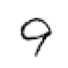

In [8]:
im.show()

In [9]:
splits = GrandparentSplitter(train_name='training', valid_name='testing')

In [10]:
items[:3]

(#3) [Path('/home/umesh/.fastai/data/mnist_png/testing/9/1655.png'),Path('/home/umesh/.fastai/data/mnist_png/testing/9/4706.png'),Path('/home/umesh/.fastai/data/mnist_png/testing/9/5968.png')]

In [11]:
splits = splits(items)

In [12]:
splits[0][:5], splits[1][:5]

([10000, 10001, 10002, 10003, 10004], [0, 1, 2, 3, 4])

In [13]:
dsrc = Datasets(items, tfms=[[PILImageBW.create], [parent_label, Categorize]], 
                  splits=splits)

<AxesSubplot:title={'center':'9'}>

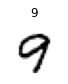

In [14]:
show_at(dsrc.train, 3)

In [15]:
tfms = [ToTensor(), CropPad(size=34, pad_mode=PadMode.Zeros), RandomCrop(size=28)]

In [16]:
gpu_tfms = [IntToFloatTensor(), Normalize()]

In [17]:
dls = dsrc.dataloaders(bs=128, after_item=tfms, after_batch=gpu_tfms)

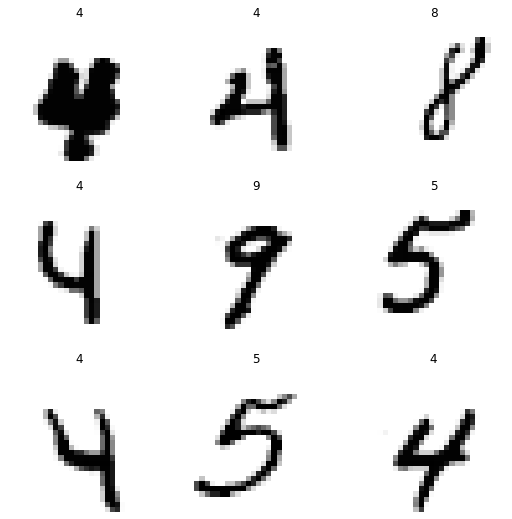

In [18]:
dls.show_batch()

In [19]:
xb, yb = dls.one_batch()

In [20]:
xb.shape, yb.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

In [21]:
dls.c

10

In [22]:
def conv(ni, nf): return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)

In [23]:
def bn(nf): return nn.BatchNorm2d(nf)

In [24]:
def ReLU(): return nn.ReLU(inplace=False)

In [25]:
Flatten??

Init signature: Flatten(full=False)
Docstring:      Flatten `x` to a single dimension, e.g. at end of a model. `full` for rank-1 tensor
File:           ~/micromamba/envs/tf-env/lib/python3.9/site-packages/fastai/layers.py
Type:           type
Subclasses:     


In [26]:
model = nn.Sequential(
    conv(1, 8),
    bn(8),
    ReLU(),
    conv(8, 16),
    bn(16),
    ReLU(),
    conv(16,32),
    bn(32),
    ReLU(),
    conv(32, 16),
    bn(16),
    ReLU(),
    conv(16, 10),
    bn(10),
    Flatten()
)


In [27]:
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

In [28]:
learn.summary()

Sequential (Input shape: 128 x 1 x 28 x 28)
Layer (type)         Output Shape         Param #    Trainable 
                     128 x 8 x 14 x 14   
Conv2d                                    80         True      
BatchNorm2d                               16         True      
ReLU                                                           
____________________________________________________________________________
                     128 x 16 x 7 x 7    
Conv2d                                    1168       True      
BatchNorm2d                               32         True      
ReLU                                                           
____________________________________________________________________________
                     128 x 32 x 4 x 4    
Conv2d                                    4640       True      
BatchNorm2d                               64         True      
ReLU                                                           
____________________________________

SuggestedLRs(valley=0.004365158267319202)

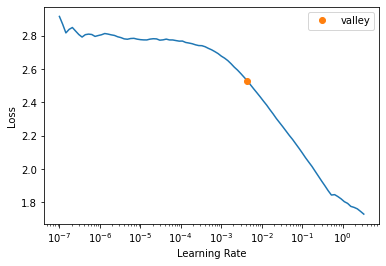

In [29]:
learn.lr_find()

In [30]:
learn.fit_one_cycle(60, lr_max=1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,0.204636,0.129863,0.971900,00:07
1,0.134011,0.081636,0.975200,00:07
2,0.122258,0.082329,0.974200,00:07
3,0.123914,0.073797,0.975800,00:07
4,0.124386,0.071111,0.976400,00:07
5,0.113768,0.087736,0.972700,00:07
6,0.108661,0.097305,0.968700,00:07
7,0.115647,0.059274,0.979800,00:07
8,0.116738,0.078162,0.974800,00:07
9,0.108164,0.210948,0.930100,00:07


In [1]:
from torch.utils import collect_env
collect_env.main()

/home/umesh/micromamba/envs/tf-env/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


PyTorch version: 1.11.0.post202
Is debug build: False
CUDA used to build PyTorch: 11.2
ROCM used to build PyTorch: N/A

OS: Ubuntu 22.04 LTS (x86_64)
GCC version: (Ubuntu 9.4.0-5ubuntu1) 9.4.0
Clang version: Could not collect
CMake version: Could not collect
Libc version: glibc-2.35

Python version: 3.9.13 | packaged by conda-forge | (main, May 27 2022, 16:56:21)  [GCC 10.3.0] (64-bit runtime)
Python platform: Linux-5.15.0-43-generic-x86_64-with-glibc2.35
Is CUDA available: True
CUDA runtime version: 11.3.58
GPU models and configuration: GPU 0: NVIDIA TITAN RTX
Nvidia driver version: 515.65.01
cuDNN version: Probably one of the following:
/usr/local/cuda-11.7/targets/x86_64-linux/lib/libcudnn.so.8.4.1
/usr/local/cuda-11.7/targets/x86_64-linux/lib/libcudnn_adv_infer.so.8.4.1
/usr/local/cuda-11.7/targets/x86_64-linux/lib/libcudnn_adv_train.so.8.4.1
/usr/local/cuda-11.7/targets/x86_64-linux/lib/libcudnn_cnn_infer.so.8.4.1
/usr/local/cuda-11.7/targets/x86_64-linux/lib/libcudnn_cnn_train.so